In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from utils import get_all_combinations, get_class_names

numpy.random.seed(1234)
data = pandas.read_csv("data/bialaczka.csv", header=0)

data.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1, inplace=True)

prediction_var = [str(i) for i in range(1, 21) if i not in [13]]

X = data[prediction_var]
y = data.Class
y = y.apply(lambda x: x - 1)

### RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [33]:
n_estimators = [i for i in range(10, 200, 5)]
max_depth = [i for i in range(6, 10)]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

In [34]:
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1)
cv_rfc.fit(X, y)

display(cv_rfc.best_score_)
display(cv_rfc.best_params_)
pandas.DataFrame(cv_rfc.cv_results_)

0.45853658536585368

{'max_depth': 7, 'n_estimators': 165}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.034033         0.002438         0.314634          0.792561   
1         0.042101         0.002969         0.348780          0.846274   
2         0.057266         0.003645         0.353659          0.870277   
3         0.073156         0.004432         0.395122          0.878109   
4         0.084034         0.004975         0.404878          0.886682   
5         0.112132         0.006141         0.382927          0.898158   
6         0.113465         0.006444         0.400000          0.903475   
7         0.127015         0.006953         0.390244          0.910041   
8         0.149278         0.008078         0.397561          0.914841   
9         0.155272         0.008516         0.419512          0.908965   
10        0.174067         0.009414         0.409756          0.917588   
11        0.216243         0.012568         0.395122          0.918957   
12        0.240584         0.012249         0.395122          0.921118   
13        0.233565         0.011307         0.417073          0.919532   
14        0.220375         0.011643         0.412195          0.922644   
15        0.245940         0.013266         0.414634          0.923232   
16        0.251009         0.013025         0.407317          0.922790   
17        0.268882         0.013912         0.439024          0.927596   
18        0.276403         0.014394         0.400000          0.928686   
19        0.288639         0.014991         0.421951          0.928312   
20        0.300073         0.015945         0.395122          0.927551   
21        0.313487         0.016295         0.439024          0.926800   
22        0.328107         0.016988         0.402439          0.929619   
23        0.338575         0.017580         0.412195          0.929232   
24        0.370985         0.018582         0.421951          0.934117   
25        0.429855         0.020755         0.409756          0.929260   
26        0.393725         0.020577         0.412195          0.928434   
27        0.588859         0.037255         0.434146          0.931626   
28        0.538644         0.027008         0.436585          0.930319   
29        0.423509         0.022100         0.424390          0.929463   
..             ...              ...              ...               ...   
122       0.174956         0.008790         0.402439          0.997849   
123       0.196632         0.009584         0.390244          0.996761   
124       0.205589         0.010330         0.402439          0.998915   
125       0.219963         0.011023         0.407317          0.998370   
126       0.237335         0.011777         0.397561          0.997835   
127       0.249873         0.012814         0.421951          0.998629   
128       0.263999         0.013018         0.424390          0.998912   
129       0.282244         0.013841         0.412195          0.998359   
130       0.299625         0.014906         0.421951          0.998375   
131       0.376404         0.019420         0.419512          0.999175   
132       0.343710         0.016548         0.417073          0.998636   
133       0.363901         0.017473         0.431707          0.998102   
134       0.412529         0.025479         0.431707          0.998906   
135       0.428338         0.018212         0.414634          0.999197   
136       0.400501         0.019597         0.409756          0.998638   
137       0.509811         0.022248         0.395122          0.998908   
138       0.606421         0.026159         0.395122          0.998918   
139       0.550008         0.024387         0.414634          0.998639   
140       0.666905         0.030350         0.426829          0.998377   
141       0.488105         0.023330         0.421951          0.998921   
142       0.499210         0.024596         0.412195          0.998381   
143       0.513795         0.024510         0.434146          0.998373   
144      

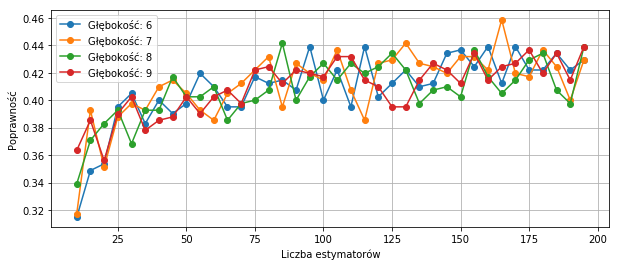

In [35]:
plt.rcParams["figure.figsize"] = [10,4]

plot_grid_search(cv_rfc.cv_results_, n_estimators, max_depth, 'Liczba estymatorów', 'Głębokość')
plt.show()

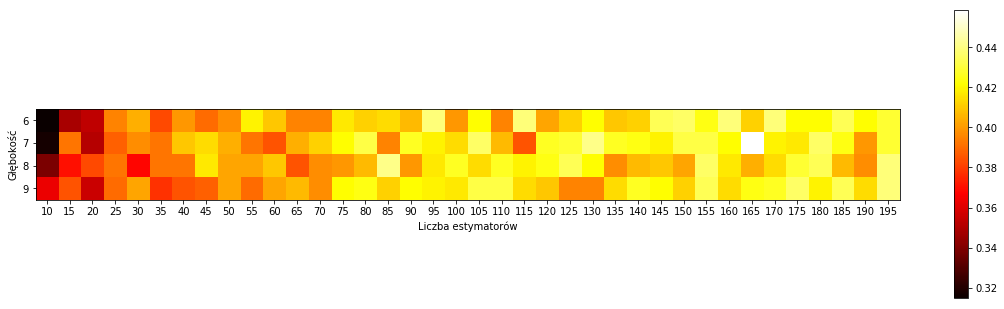

In [38]:
from utils import plot_grid_search_heatmap

plt.rcParams["figure.figsize"] = [20,5]
plot_grid_search_heatmap(cv_rfc.cv_results_, n_estimators, max_depth, 'Liczba estymatorów', 'Głębokość')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=Warning)

base_classifiers = [
    SVC(probability=True, kernel='poly', C=.5),
    KNeighborsClassifier(n_neighbors=13),
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(max_depth=6),
    MLPClassifier(max_iter=100, batch_size=80, learning_rate_init=0.001, momentum=0.6)
]

### Elementary

In [28]:
from elementary_multiclassifier import ElementaryMultiClassifier

rules = ['max', 'min', 'sum', 'median', 'product']
combinations = get_all_combinations(base_classifiers, starting_size=2)

param_grid = dict(classifiers=combinations,
                  rule=rules)

model = ElementaryMultiClassifier()

cv_elem = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_elem.fit(X, y)

display(cv_elem.best_score_)
class_names = get_class_names(cv_elem.best_params_.pop('classifiers'))
display(class_names)
display(cv_elem.best_params_)
pandas.DataFrame(cv_elem.cv_results_)

0.4170731707317073

['SVC', 'LogisticRegression', 'GaussianNB', 'DecisionTreeClassifier']

{'rule': 'median'}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.172141         0.017230         0.351220          0.602815   
1         0.211644         0.019534         0.380488          0.698402   
2         0.180322         0.016875         0.392683          0.672505   
3         0.194813         0.074456         0.387805          0.671139   
4         0.201419         0.014534         0.392683          0.688269   
5         0.218355         0.016328         0.365854          0.624610   
6         0.278040         0.022385         0.378049          0.687354   
7         0.219353         0.016481         0.365854          0.669366   
8         0.269477         0.084895         0.365854          0.671162   
9         0.214246         0.014080         0.365854          0.687253   
10        0.225464         0.022834         0.253659          0.385837   
11        0.209396         0.019249         0.295122          0.456039   
12        0.175986         0.017427         0.260976          0.400469   
13        0.176405         0.064386         0.260976          0.399648   
14        0.176274         0.015516         0.270732          0.424072   
15        0.176196         0.016057         0.334146          0.606613   
16        0.174935         0.015652         0.353659          0.760737   
17        0.176212         0.015884         0.368293          0.667074   
18        0.174018         0.059842         0.360976          0.666296   
19        0.172918         0.013528         0.375610          0.718516   
20        1.336694         0.015349         0.353659          0.619212   
21        1.334016         0.015934         0.358537          0.681889   
22        1.340968         0.016646         0.373171          0.661813   
23        1.328921         0.063769         0.368293          0.668766   
24        1.683722         0.015638         0.373171          0.677582   
25        0.054411         0.015593         0.360976          0.577295   
26        0.047233         0.014430         0.356098          0.590584   
27        0.099607         0.034250         0.392683          0.604938   
28        0.056304         0.089801         0.392683          0.604938   
29        0.051182         0.014481         0.380488          0.606540   
..             ...              ...              ...               ...   
255       1.531497         0.023413         0.265854          0.397215   
256       1.532514         0.023940         0.304878          0.479670   
257       1.528881         0.023892         0.368293          0.530696   
258       1.504726         0.073547         0.378049          0.641507   
259       1.524682         0.020912         0.348780          0.538771   
260       1.529865         0.021378         0.341463          0.648392   
261       1.525254         0.021980         0.353659          0.734166   
262       1.532283         0.021807         0.400000          0.732176   
263       1.515143         0.068795         0.397561          0.681263   
264       1.531933         0.018894         0.392683          0.766035   
265       1.480656         0.023190         0.292683          0.526629   
266       1.482415         0.023204         0.343902          0.659498   
267       1.483870         0.023086         0.375610          0.624338   
268       1.671309         0.081060         0.407317          0.716390   
269       1.683204         0.021883         0.358537          0.691182   
270       1.637063         0.022073         0.295122          0.526376   
271       1.843735         0.027859         0.353659          0.640008   
272       1.752914         0.022901         0.392683          0.629162   
273       1.868085         0.104517         0.407317          0.688568   
274       1.561472         0.019090         0.365854          0.678498   
275       1.629911         0.026643         0.297561          0.524990   
276       1.683797         0.028617         0.339024          0.660094   
277      

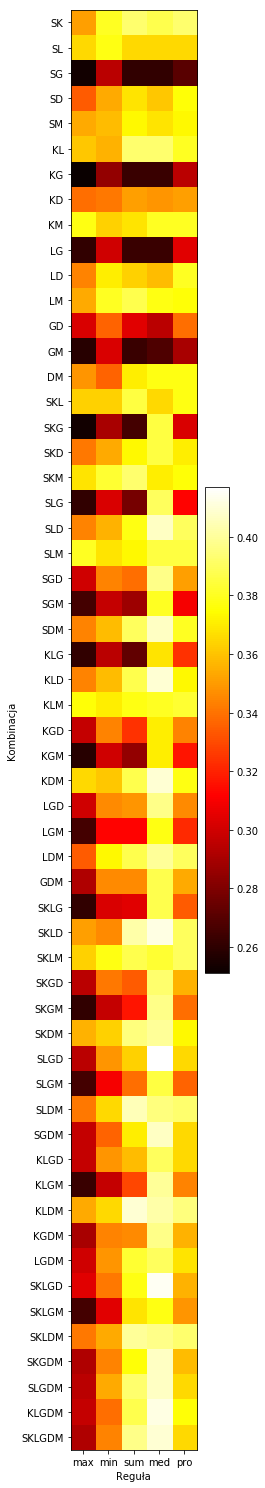

In [31]:
from utils import plot_grid_search_heatmap
plt.rcParams["figure.figsize"] = [3,25]

names = [''.join(map(lambda n: n[0], get_class_names(c))) for c in combinations]
plot_grid_search_heatmap(cv_elem.cv_results_, [r[:3] for r in rules], names, 'Reguła', 'Kombinacja')

### Voting

In [33]:
from votingclassifier import VotingClassifier

use_weighted = [False, True]
combinations = get_all_combinations(base_classifiers, starting_size=2)

param_grid = dict(classifiers=combinations,
                 weighted_voting=use_weighted)

model = VotingClassifier()

cv_multi = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_multi.fit(X, y)

display(cv_multi.best_score_)
class_names = get_class_names(cv_multi.best_params_.pop('classifiers'))
display(class_names)
display(cv_multi.best_params_)
pandas.DataFrame(cv_multi.cv_results_)


0.42195121951219511

['SVC', 'LogisticRegression', 'DecisionTreeClassifier']

{'weighted_voting': False}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.174274         0.005046         0.390244          0.871329   
1         0.189745         1.653329         0.390244          0.871329   
2         0.288302         0.002916         0.390244          0.871329   
3         0.230891         2.186873         0.375610          0.688172   
4         0.178806         0.004109         0.390244          0.871329   
5         0.180370         1.724461         0.390244          0.871329   
6         0.191412         0.002838         0.390244          0.871329   
7         0.185774         1.868409         0.373171          0.846261   
8         1.511700         0.003453         0.390244          0.871329   
9         1.682037        15.073814         0.373171          0.871329   
10        0.054733         0.004024         0.302439          0.469337   
11        0.069173         0.611095         0.363415          0.566169   
12        0.007422         0.005714         0.302439          0.469337   
13        0.007218         0.136211         0.302439          0.459122   
14        0.006393         0.006268         0.302439          0.469337   
15        0.005127         0.124341         0.341463          0.583725   
16        1.696286         0.005077         0.302439          0.469337   
17        1.447443        13.042600         0.375610          0.559536   
18        0.055498         0.002968         0.363415          0.566169   
19        0.082841         0.705121         0.363415          0.566169   
20        0.074318         0.001491         0.363415          0.566169   
21        0.076209         0.727009         0.363415          0.570529   
22        1.509228         0.002061         0.363415          0.566169   
23        1.490440        13.247915         0.363415          0.566700   
24        0.008046         0.003199         0.251220          0.383931   
25        0.009641         0.155356         0.339024          0.584781   
26        1.455390         0.003749         0.251220          0.383931   
27        1.423926        13.226072         0.375610          0.567496   
28        1.312187         0.002037         0.334146          0.583725   
29        1.342340        11.991630         0.339024          0.576678   
..             ...              ...              ...               ...   
84        1.913617         0.006179         0.390244          0.721176   
85        2.045727        17.146795         0.387805          0.653459   
86        1.869478         0.004193         0.404878          0.765000   
87        1.875203        17.201710         0.397561          0.681946   
88        1.832954         0.006239         0.402439          0.802924   
89        1.992596        17.988578         0.414634          0.787380   
90        0.102759         0.011070         0.353659          0.587265   
91        0.079479         0.936641         0.370732          0.610527   
92        1.978434         0.008427         0.373171          0.566435   
93        1.666460        15.169693         0.382927          0.581910   
94        1.646335         0.005801         0.370732          0.600536   
95        1.572010        14.439614         0.380488          0.605396   
96        1.541660         0.007659         0.353659          0.582858   
97        1.512653        14.170551         0.368293          0.610250   
98        1.598135         0.005894         0.378049          0.599490   
99        1.779044        16.218623         0.390244          0.603479   
100       0.353376         0.010350         0.419512          0.775669   
101       0.354894         2.990003         0.417073          0.753981   
102       1.888950         0.012685         0.387805          0.709573   
103       1.984580        16.613681         0.385366          0.654243   
104       1.872987         0.008871         0.417073          0.738524   
105       2.059747        18.901604         0.397561          0.690639   
106      

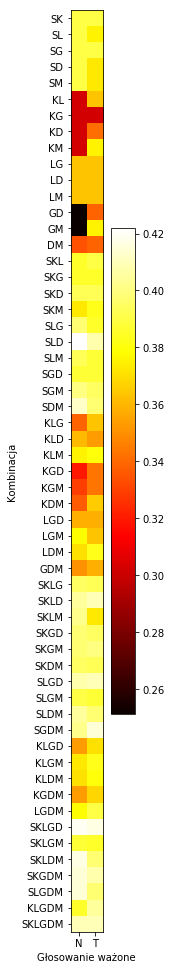

In [40]:
plt.rcParams["figure.figsize"] = [3,16]
plot_grid_search_heatmap(cv_multi.cv_results_, ['N', 'T'], names, 'Głosowanie ważone', 'Kombinacja')
plt.show()

### Selective

In [14]:
from selective_multiclassifier import SelectiveMultiClassifier

clusters = range(2,8)
combinations = get_all_combinations(base_classifiers, starting_size=2)

param_grid = dict(classifiers=combinations,
                 n_clusters=clusters)

model = SelectiveMultiClassifier(base_classifiers)

cv_select = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_select.fit(X, y)

display(cv_select.best_score_)
class_names = get_class_names(cv_select.best_params_.pop('classifiers'))
display(class_names)
display(cv_select.best_params_)
pandas.DataFrame(cv_select.cv_results_)

0.41219512195121949

['SVC',
 'KNeighborsClassifier',
 'GaussianNB',
 'DecisionTreeClassifier',
 'MLPClassifier']

{'n_clusters': 3}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.949675         0.015063         0.382927          0.787909   
1         1.095241         0.018206         0.382927          0.752407   
2         1.188628         0.016893         0.368293          0.778901   
3         1.254456         0.017237         0.368293          0.770512   
4         1.418621         0.017072         0.378049          0.764885   
5         1.612530         0.017430         0.360976          0.776623   
6         0.979652         0.007143         0.392683          0.698550   
7         1.044807         0.006460         0.390244          0.667575   
8         1.139920         0.007031         0.395122          0.685985   
9         1.238355         0.006969         0.375610          0.699985   
10        1.286949         0.007181         0.378049          0.674092   
11        1.499753         0.006949         0.368293          0.689076   
12        1.041426         0.009459         0.390244          0.871329   
13        1.303196         0.010686         0.390244          0.871329   
14        1.406725         0.014076         0.375610          0.829307   
15        1.529521         0.019344         0.360976          0.778744   
16        1.671730         0.020501         0.356098          0.769421   
17        1.804764         0.022326         0.358537          0.750371   
18        0.956560         0.009311         0.400000          0.791273   
19        1.145109         0.009363         0.397561          0.794314   
20        1.222415         0.009233         0.395122          0.782849   
21        1.363336         0.009162         0.390244          0.789940   
22        1.410145         0.009213         0.402439          0.760949   
23        1.562544         0.009230         0.385366          0.758291   
24        7.130787         0.010665         0.402439          0.792938   
25        7.877560         0.010785         0.387805          0.771443   
26        7.571145         0.011251         0.380488          0.827446   
27        9.470193         0.011197         0.380488          0.758137   
28       10.472842         0.011151         0.375610          0.746987   
29       10.832859         0.010940         0.397561          0.767126   
..             ...              ...              ...               ...   
312       8.860446         0.008770         0.392683          0.698550   
313       8.859066         0.010550         0.385366          0.670034   
314       7.950493         0.014548         0.382927          0.659388   
315      10.097803         0.009622         0.373171          0.664282   
316      11.397107         0.012555         0.375610          0.641786   
317      11.890794         0.019450         0.365854          0.645939   
318       9.126942         0.018750         0.380488          0.775477   
319       9.871862         0.019994         0.412195          0.727303   
320       9.775602         0.026043         0.368293          0.734525   
321      10.889672         0.023041         0.356098          0.674243   
322      11.686702         0.022555         0.358537          0.646138   
323      12.426565         0.032234         0.370732          0.635766   
324       7.986041         0.009301         0.392683          0.698826   
325       8.993903         0.008683         0.382927          0.670840   
326       8.663289         0.018680         0.375610          0.671041   
327      10.754088         0.016658         0.343902          0.629770   
328      10.582010         0.017007         0.382927          0.641712   
329      11.854964         0.025800         0.334146          0.613152   
330       7.800057         0.009578         0.363415          0.566441   
331       8.444861         0.009211         0.348780          0.567832   
332       8.487054         0.021800         0.324390          0.537261   
333      10.548663         0.019620         0.343902          0.544268   
334      

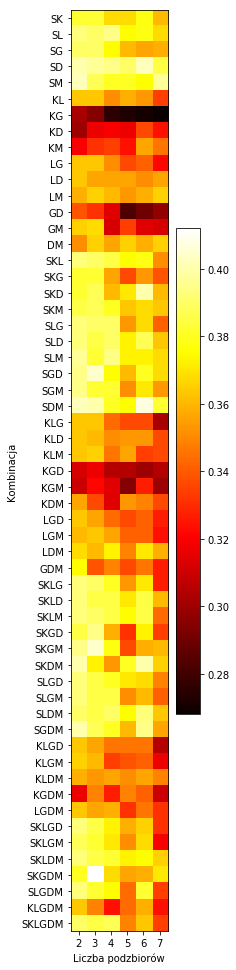

In [20]:
from utils import plot_grid_search_heatmap
plt.rcParams["figure.figsize"] = [3,16]

names = [''.join(map(lambda n: n[0], get_class_names(c))) for c in combinations]
plot_grid_search_heatmap(cv_select.cv_results_, clusters, names, 'Liczba podzbiorów', 'Kombinacja')
plt.show()

In [1]:
from random_forest_classifier import CustomRandomForest

model = CustomRandomForest()

n_estimators = [i for i in range(10, 200, 5)]
k_out = [i for i in range(10, 250, 20)]

param_grid = {
    'n_estimators': n_estimators,
    'k_out': k_out
}

### Custom Random Forest - random subsets

In [11]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

cv_myrfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_myrfc.fit(X, y)

display(cv_myrfc.best_score_)
display(cv_myrfc.best_params_)
pandas.DataFrame(cv_myrfc.cv_results_)

0.40487804878048783

{'k_out': 90, 'n_estimators': 160}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0         0.460964         0.005397         0.356098          0.605901   
1         0.457716         0.005405         0.358537          0.606961   
2         0.454004         0.005368         0.358537          0.609413   
3         0.456624         0.005510         0.356098          0.609079   
4         0.455480         0.005457         0.356098          0.609164   
5         0.455893         0.005422         0.358537          0.603386   
6         0.454425         0.005370         0.353659          0.606141   
7         0.456351         0.005346         0.348780          0.605669   
8         0.456397         0.005424         0.360976          0.607126   
9         0.456943         0.005578         0.358537          0.609989   
10        0.457107         0.005438         0.356098          0.608846   
11        0.460865         0.005440         0.348780          0.608015   
12        0.456694         0.005511         0.351220          0.603669   
13        0.456799         0.005449         0.348780          0.608453   
14        0.456974         0.005425         0.356098          0.609897   
15        0.454964         0.005432         0.356098          0.609116   
16        0.455850         0.005446         0.346341          0.608003   
17        0.455761         0.005446         0.346341          0.610987   
18        0.456627         0.005453         0.356098          0.603895   
19        0.455706         0.005447         0.353659          0.610389   
20        0.457575         0.005418         0.353659          0.610729   
21        0.455422         0.005530         0.363415          0.604690   
22        0.456605         0.005464         0.348780          0.610242   
23        0.456711         0.005415         0.363415          0.607800   
24        0.456757         0.005384         0.348780          0.610679   
25        0.457189         0.005443         0.363415          0.603099   
26        0.456061         0.005500         0.348780          0.609939   
27        0.454764         0.005410         0.351220          0.606652   
28        0.456173         0.005480         0.353659          0.601993   
29        0.455499         0.005443         0.360976          0.611159   
..             ...              ...              ...               ...   
426       0.414500         0.006088         0.373171          0.709238   
427       0.411177         0.005965         0.353659          0.693512   
428       0.412042         0.006057         0.346341          0.705515   
429       0.413146         0.006053         0.365854          0.703509   
430       0.413519         0.006012         0.339024          0.707219   
431       0.412415         0.006032         0.378049          0.702622   
432       0.413844         0.006088         0.343902          0.707284   
433       0.411320         0.006077         0.351220          0.698936   
434       0.412771         0.006051         0.341463          0.710512   
435       0.413364         0.006047         0.353659          0.705713   
436       0.412102         0.006056         0.370732          0.698966   
437       0.414600         0.006044         0.351220          0.713760   
438       0.413210         0.006015         0.375610          0.713703   
439       0.413789         0.006020         0.351220          0.704879   
440       0.410134         0.006040         0.363415          0.710528   
441       0.412859         0.006036         0.346341          0.719220   
442       0.411332         0.006045         0.358537          0.709264   
443       0.412603         0.006095         0.334146          0.704291   
444       0.410391         0.006052         0.353659          0.713768   
445       0.410662         0.005983         0.370732          0.702297   
446       0.405711         0.005833         0.351220          0.709387   
447       0.404228         0.005877         0.363415          0.707204   
448      

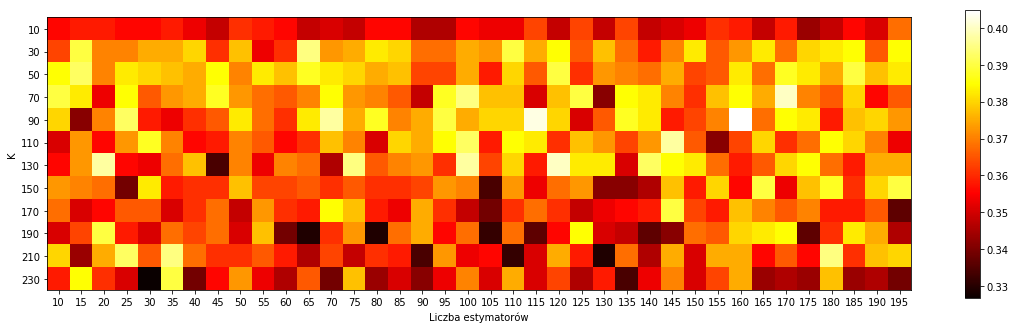

In [12]:
from utils import plot_grid_search_heatmap

plt.rcParams["figure.figsize"] = [20,5]
plot_grid_search_heatmap(cv_myrfc.cv_results_, n_estimators, k_out, 'Liczba estymatorów', 'K')

### Custom Random Forest - k split

In [7]:
from random_forest_classifier import CustomRandomForest

model = CustomRandomForest(use_k_split=True)

n_estimators = [i for i in range(10, 200, 5)]

param_grid = {
    'n_estimators': n_estimators,
}

In [14]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

cv_myrfc2 = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_myrfc2.fit(X, y)

display(cv_myrfc2.best_score_)
display(cv_myrfc2.best_params_)
df = pandas.DataFrame(cv_myrfc2.cv_results_)
df.to_csv('measures/csvs/custom_rfc_k_split.csv', sep='\t', encoding='utf-8')

df

0.39512195121951221

{'n_estimators': 30}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.373079         0.005842         0.378049          0.629899   
1        0.382960         0.005778         0.368293          0.622926   
2        0.373126         0.005491         0.365854          0.628248   
3        0.434449         0.006638         0.368293          0.627206   
4        0.484677         0.008373         0.395122          0.626093   
5        0.450195         0.005773         0.373171          0.626744   
6        0.398008         0.005560         0.368293          0.628846   
7        0.392211         0.005805         0.356098          0.626393   
8        0.384905         0.005599         0.375610          0.631288   
9        0.411689         0.005676         0.370732          0.629113   
10       0.420098         0.007271         0.370732          0.629400   
11       0.381859         0.005561         0.380488          0.633412   
12       0.397111         0.005967         0.370732          0.624598   
13       0.383168         0.005591         0.375610          0.629638   
14       0.399163         0.005817         0.373171          0.628519   
15       0.388098         0.006917         0.358537          0.625789   
16       0.389369         0.005592         0.380488          0.630458   
17       0.467368         0.006873         0.368293          0.626399   
18       0.453640         0.005781         0.373171          0.631767   
19       0.510845         0.007923         0.370732          0.628544   
20       0.390765         0.005727         0.365854          0.629116   
21       0.398939         0.006410         0.365854          0.627837   
22       0.382297         0.005475         0.370732          0.625860   
23       0.399738         0.005542         0.373171          0.626424   
24       0.391670         0.005700         0.360976          0.636692   
25       0.398088         0.005569         0.373171          0.626681   
26       0.381048         0.005559         0.392683          0.627285   
27       0.401107         0.005811         0.351220          0.626663   
28       0.406729         0.006186         0.368293          0.625091   
29       0.419869         0.007761         0.375610          0.623966   
30       0.384221         0.005712         0.373171          0.627749   
31       0.379657         0.005505         0.373171          0.627225   
32       0.435480         0.006655         0.365854          0.627266   
33       0.383619         0.005848         0.370732          0.630511   
34       0.383066         0.005646         0.358537          0.624262   
35       0.372864         0.005593         0.368293          0.632622   
36       0.377823         0.005727         0.368293          0.629922   
37       0.354779         0.004974         0.380488          0.633466   

   param_n_estimators                 params  rank_test_score  \
0                  10   {'n_estimators': 10}                6   
1                  15   {'n_estimators': 15}               23   
2                  20   {'n_estimators': 20}               30   
3                  25   {'n_estimators': 25}               23   
4                  30   {'n_estimators': 30}                1   
5                  35   {'n_estimators': 35}               10   
6                  40   {'n_estimators': 40}               23   
7                  45   {'n_estimators': 45}               37   
8                  50   {'n_estimators': 50}                7   
9                  55   {'n_estimators': 55}               17   
10                 60   {'n_estimators': 60}               17   
11                 65   {'n_estimators': 65}                3   
12                 70   {'n_estimators': 70}               17   
13                 75   {'n_estimators': 75}                7   
14                 80   {'n_estimators': 80}               10   
15                 85   {'n_estimators': 85}               35   
16                 90   {'n_estimators': 90}       

In [6]:
from dynamic_multiclassifier import DynamicMultiClassifier

model = DynamicMultiClassifier(base_classifiers)

In [12]:
n_neighbours = list(range(2, 50))

param_grid = {
    'neighbours': n_neighbours,
}

In [13]:
cv_dyn = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_dyn.fit(X, y)

display(cv_dyn.best_score_)
display(cv_dyn.best_params_)
df = pandas.DataFrame(cv_dyn.cv_results_)
df.to_csv('measures/csvs/dynamic_neighbours.csv', sep='\t', encoding='utf-8')

df

0.40000000000000002

{'neighbours': 4}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        1.418037         0.177637         0.375610          0.827079   
1        1.413774         0.192330         0.387805          0.829613   
2        1.441738         0.190706         0.400000          0.829897   
3        1.422489         0.197700         0.400000          0.838510   
4        1.411392         0.202591         0.395122          0.838559   
5        1.446221         0.210363         0.397561          0.848021   
6        1.416936         0.205006         0.397561          0.857512   
7        1.567140         0.225249         0.395122          0.859101   
8        1.540876         0.238781         0.397561          0.859893   
9        1.552235         0.235493         0.397561          0.862333   
10       1.565159         0.250468         0.400000          0.860471   
11       1.566162         0.245363         0.395122          0.865307   
12       1.568905         0.249484         0.397561          0.864502   
13       1.544376         0.246515         0.400000          0.865328   
14       1.548619         0.253150         0.390244          0.865071   
15       1.546736         0.259261         0.390244          0.865878   
16       1.589932         0.271647         0.392683          0.866167   
17       1.769708         0.295695         0.400000          0.865599   
18       1.588492         0.290405         0.392683          0.865623   
19       2.033139         0.363613         0.392683          0.866721   
20       1.553225         0.275645         0.390244          0.867809   
21       1.578673         0.282233         0.390244          0.869412   
22       1.557190         0.283975         0.390244          0.869153   
23       1.533714         0.284206         0.387805          0.868058   
24       1.574806         0.293828         0.390244          0.869140   
25       1.556503         0.289849         0.390244          0.869949   
26       1.544290         0.307432         0.387805          0.871033   
27       1.570227         0.303747         0.385366          0.870496   
28       1.544872         0.301307         0.390244          0.869693   
29       1.553234         0.306460         0.390244          0.869964   
30       1.543370         0.304290         0.390244          0.870506   
31       1.536620         0.311995         0.390244          0.870241   
32       1.545222         0.314971         0.390244          0.870511   
33       1.546232         0.324163         0.390244          0.871051   
34       1.707763         0.342398         0.390244          0.870780   
35       1.693770         0.358769         0.390244          0.870778   
36       1.832631         0.402541         0.390244          0.871580   
37       1.718921         0.359726         0.390244          0.870526   
38       1.872416         0.415199         0.390244          0.871051   
39       1.653577         0.356385         0.390244          0.871063   
40       1.597516         0.380065         0.390244          0.871593   
41       1.577322         0.356476         0.390244          0.871593   
42       1.567189         0.359334         0.390244          0.871593   
43       1.562717         0.370238         0.390244          0.871329   
44       1.724267         0.391416         0.390244          0.871858   
45       1.591370         0.387595         0.390244          0.871593   
46       1.563022         0.373565         0.390244          0.871593   
47       1.527221         0.366033         0.390244          0.871593   

   param_neighbours              params  rank_test_score  split0_test_score  \
0                 2   {'neighbours': 2}               48               0.44   
1                 3   {'neighbours': 3}               44               0.44   
2                 4   {'neighbours': 4}                1               0.46   
3                 5   {'neighbours': 5}                1               0.46   
4                 6   {'neighbo

In [6]:
combinations = get_all_combinations(base_classifiers, starting_size=2)

param_grid = dict(classifiers=combinations)

from dt_multiclassifier import DTMultiClassifier

model = DTMultiClassifier()

cv_dyn = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
cv_dyn.fit(X, y)

display(cv_dyn.best_score_)
display(cv_dyn.best_params_)
pandas.DataFrame(cv_dyn.cv_results_)

0.39756097560975612

{'classifiers': (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=13, p=2,
             weights='uniform'),
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))}

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.235822         0.064526         0.360976          0.690869   
1        0.267985         0.039204         0.365854          0.660769   
2        0.281190         0.096793         0.273171          0.426811   
3        0.215979         0.037333         0.346341          0.632906   
4        1.400370         0.040491         0.348780          0.648168   
5        0.086391         0.060076         0.397561          0.631445   
6        0.074877         0.118818         0.268293          0.421709   
7        0.039284         0.059413         0.331707          0.620138   
8        1.208279         0.060206         0.370732          0.618529   
9        0.099706         0.089837         0.292683          0.458069   
10       0.067083         0.034551         0.365854          0.649965   
11       1.233952         0.036196         0.370732          0.589373   
12       0.052486         0.089330         0.334146          0.615950   
13       1.219784         0.088936         0.292683          0.468467   
14       1.186258         0.036534         0.356098          0.649082   
15       0.291183         0.070264         0.380488          0.679736   
16       0.280419         0.132201         0.290244          0.462095   
17       0.244664         0.073787         0.358537          0.659226   
18       1.454852         0.079662         0.385366          0.666401   
19       0.332207         0.112715         0.304878          0.496589   
20       0.314895         0.054103         0.373171          0.677303   
21       1.598946         0.057018         0.382927          0.629161   
22       0.285174         0.116248         0.346341          0.638442   
23       1.571677         0.116811         0.314634          0.509176   
24       1.553241         0.054676         0.387805          0.682661   
25       0.135665         0.140005         0.314634          0.490376   
26       0.099500         0.073546         0.368293          0.673353   
27       1.383556         0.078406         0.390244          0.619258   
28       0.084798         0.135451         0.356098          0.635194   
29       1.367790         0.140785         0.324390          0.499297   
30       1.354665         0.077811         0.380488          0.674099   
31       0.118322         0.108224         0.365854          0.646591   
32       1.418271         0.104313         0.331707          0.519157   
33       1.385924         0.050033         0.373171          0.681090   
34       1.369478         0.112365         0.368293          0.649898   
35       0.355362         0.149240         0.321951          0.524882   
36       0.314732         0.087432         0.370732          0.697724   
37       1.623905         0.094573         0.380488          0.659935   
38       0.305436         0.152310         0.365854          0.655510   
39       1.610576         0.154525         0.334146          0.532760   
40       1.571253         0.094486         0.387805          0.702516   
41       0.334207         0.126762         0.375610          0.663990   
42       1.645745         0.122205         0.346341          0.544884   
43       1.599105         0.064734         0.385366          0.701090   
44       1.582752         0.125776         0.363415          0.669966   
45       0.139986         0.143410         0.368293          0.659589   
46       1.442559         0.147502         0.329268          0.536306   
47       1.402926         0.086466         0.385366          0.694654   
48       1.386848         0.150137         0.370732          0.660116   
49       1.421994         0.119847         0.385366          0.664196   
50       0.364201         0.159826         0.375610          0.675900   
51       1.674691         0.160276         0.341463          0.573691   
52       1.669420         0.104370         0.385366          0.714900   
53       1.603414         0.164318         0.387805          0

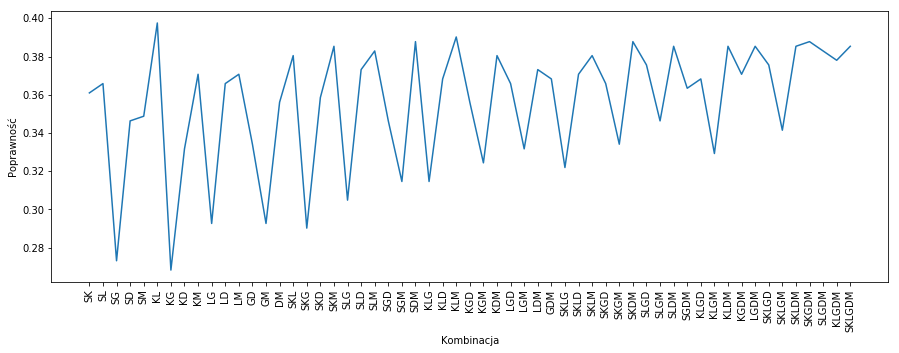

In [46]:
plt.rcParams["figure.figsize"] = [15,5]

scores = cv_dyn.cv_results_['mean_test_score']
names = [''.join(map(lambda n: n[0], get_class_names(c))) for c in combinations]
_, ax = plt.subplots(1, 1)
ax.plot(range(57), scores)
plt.xticks(range(57), names, rotation='vertical')
plt.ylabel('Poprawność')
plt.xlabel('Kombinacja')
plt.show()